## Linear model computing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import sys
import seaborn as sns
import matplotlib.colors as colors
import time


from matplotlib import rcParams
rcParams['figure.dpi']=100
rcParams['figure.figsize']=[6, 4]
rcParams['font.size']=14

In [2]:
def frequency(wavelength):
    c = 299792458
    return 2*np.pi*c/wavelength/1e-9
def RungeKutta4(func, initials, time):
    '''
    func: function to be integrated
    initials: list of initial conditions
    time: array of independent variable
    '''
    dt = time[1]-time[0]
    dim = len(initials)
    y = np.zeros([dim, time.size]).astype('complex128')
    for i in range(dim):
        y[i, 0]=initials[i]
    for j in range(time.size-1):
        y_prev = np.array(y[:, j]).astype('complex128')
        k1=np.array( func(time[j], y_prev) ).astype('complex128')
        k2=np.array( func(time[j]+dt/2, y_prev+k1*dt/2) ).astype('complex128')
        k3=np.array( func(time[j]+dt/2, y_prev+k2*dt/2) ).astype('complex128')
        k4=np.array( func(time[j]+dt, y_prev+k3*dt) ).astype('complex128')
        a=np.zeros([dim]).astype('complex128')
        for k in range(dim):
            a[k] = (k1[k]+2*k2[k]+k4[k]+2*k3[k])*dt/6
            y[k, j+1]=y_prev[k]+a[k]
    for i in range(dim):
        y=y.astype('complex128')
    return y
def Transmission(a_cw, A_in):
    return abs(1+1j*np.sqrt(2*Gamma_ext)*a_cw/A_in)**2
def Reflection(a_ccw, A_in):
    return abs(1j*np.sqrt(2*Gamma_ext)*a_ccw/A_in)**2

In [3]:
def acw_accw(t, y):
    '''
    '''
    a_cw, a_ccw = y
    dydt = [(1j*domega-Gamma_0-Gamma_ext)*a_cw +1j*Gamma_c*a_ccw+1j*np.sqrt(2*Gamma_ext)*A_in, 
            (1j*domega-Gamma_0-Gamma_ext)*a_ccw+1j*Gamma_c*a_cw]
    dydt = np.array(dydt)
    dydt.astype('complex128')
    return dydt

In [4]:
# constants
Gamma_0 = 1.6 #GHz
Gamma_ext= 3 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

In [5]:
P_in = 1 #in mW
A_in = np.sqrt(P_in) #is sqrt(mW)=sqrt(pJ/ns)

acw_0 = 0
accw_0 = 0
init = [acw_0, accw_0]

In [17]:
t0 = 5
N = 1e+3
t = np.linspace(0, t0, int(N))
a_cw, a_ccw  = RungeKutta4(acw_accw, init, t)

A_cw = abs(a_cw)**2
A_ccw = abs(a_ccw)**2
T = Transmission(a_cw, A_in)
R = Reflection(a_ccw,  A_in)

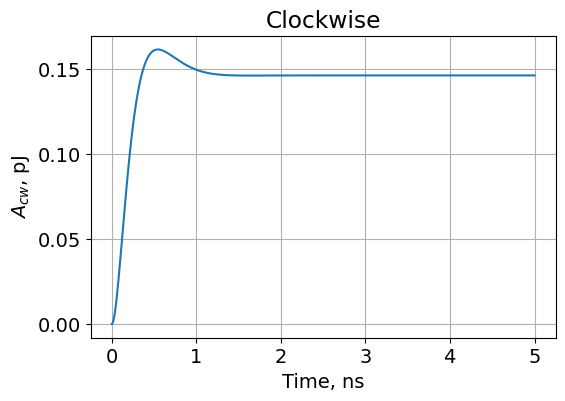

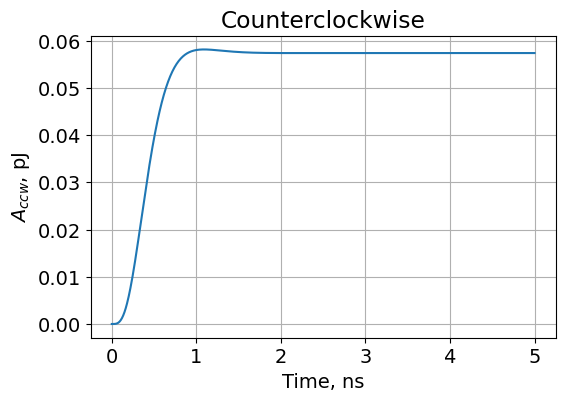

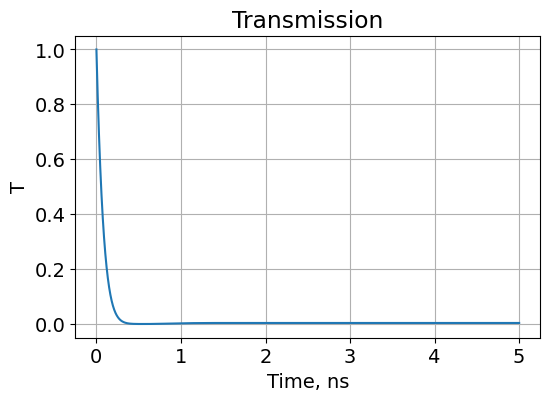

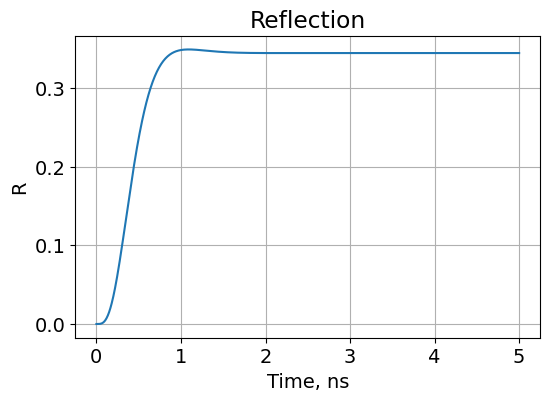

In [18]:
plt.figure(figsize=(6, 4))
plt.title('Clockwise')
plt.ylabel(r'$A_{cw}$, pJ')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, A_cw)

plt.figure(figsize=(6, 4))
plt.title('Counterclockwise')
plt.ylabel(r'$A_{ccw}$, pJ')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, A_ccw)

plt.figure(figsize=(6, 4))
plt.title('Transmission')
plt.ylabel(r'T')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, T)

plt.figure(figsize=(6, 4))
plt.title('Reflection')
plt.ylabel(r'R')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, R)

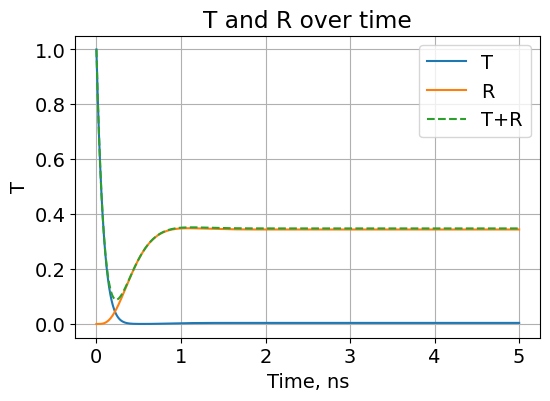

In [19]:
plt.figure(figsize=(6, 4))
plt.title('T and R over time')
plt.ylabel(r'T')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, T, label = 'T')
plt.plot(t, R, label = 'R')
plt.plot(t, R+T, '--', label = 'T+R')
plt.legend()

## Finding out transmission T($\Gamma_{ext}$)

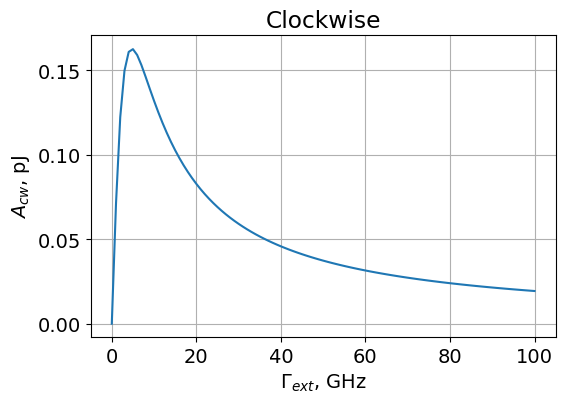

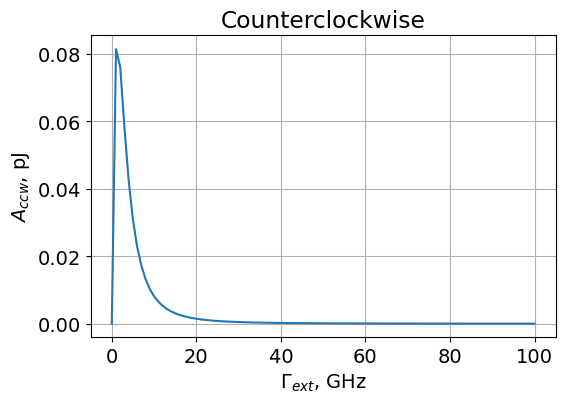

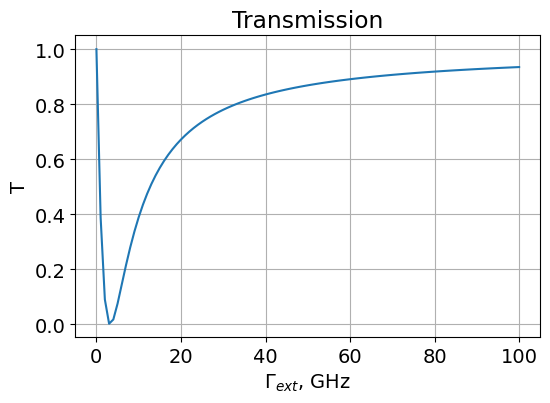

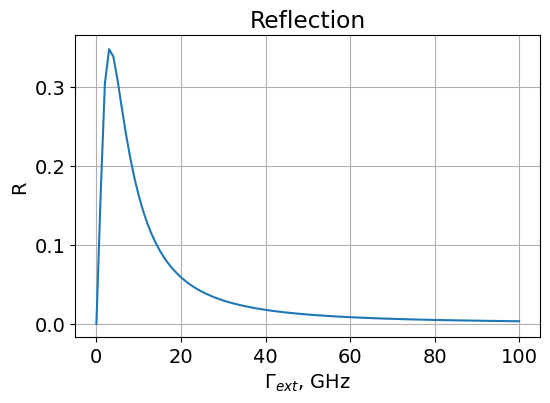

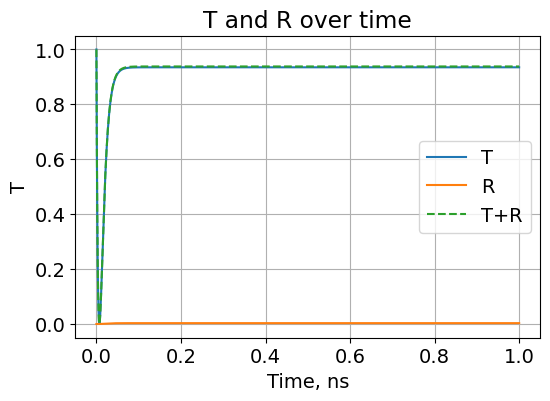

In [21]:
# constants
Gamma_0 = 1.6 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

Gamma_exts = np.arange(0, 101, 1)
Xgrid = Gamma_exts
P_in = 1 #in mW
A_in = np.sqrt(P_in) #is sqrt(mW)=sqrt(pJ/ns)

acw_0 = 0
accw_0 = 0
init = [acw_0, accw_0]

As_cw = []
As_ccw = []
Ts = []
Rs = []
for Gamma_ext in Gamma_exts:
    t0 = 1
    N = 1e+3
    t = np.linspace(0, t0, int(N))
    a_cw, a_ccw  = RungeKutta4(acw_accw, init, t)
    
    A_cw = abs(a_cw)**2
    A_ccw = abs(a_ccw)**2
    T = Transmission(a_cw, A_in)
    R = Reflection(a_ccw,  A_in)
    
    As_cw.append(A_cw[-1]) 
    As_ccw.append(A_ccw[-1])
    Ts.append(T[-1])
    Rs.append(R[-1])
    
plt.figure(figsize=(6, 4))
plt.title('Clockwise')
plt.ylabel(r'$A_{cw}$, pJ')
plt.xlabel(r'$\Gamma_{ext}$, GHz')
plt.grid()
plt.plot(Gamma_exts, As_cw)

plt.figure(figsize=(6, 4))
plt.title('Counterclockwise')
plt.ylabel(r'$A_{ccw}$, pJ')
plt.xlabel(r'$\Gamma_{ext}$, GHz')
plt.grid()
plt.plot(Gamma_exts, As_ccw)

plt.figure(figsize=(6, 4))
plt.title('Transmission')
plt.ylabel(r'T')
plt.xlabel(r'$\Gamma_{ext}$, GHz')
plt.grid()
plt.plot(Gamma_exts, Ts)

plt.figure(figsize=(6, 4))
plt.title('Reflection')
plt.ylabel(r'R')
plt.xlabel(r'$\Gamma_{ext}$, GHz')
plt.grid()
plt.plot(Gamma_exts, Rs)

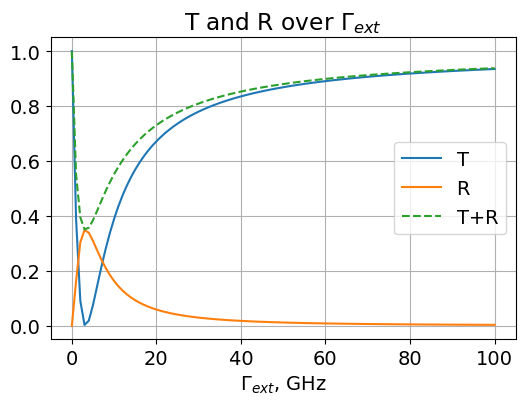

In [25]:
plt.figure(figsize=(6, 4))
plt.title('T and R over $\Gamma_{ext}$')
# plt.ylabel(r'T')
plt.grid()
plt.xlabel(r'$\Gamma_{ext}$, GHz')
plt.plot(Gamma_exts, Ts, label = 'T')
plt.plot(Gamma_exts, Rs, label = 'R')
plt.plot(Gamma_exts, np.array(Ts)+np.array(Rs), '--', label = 'T+R')
plt.legend()

## Finding out transmission T($\lambda$) 
####  $\Gamma_{ext}$=3 GHz

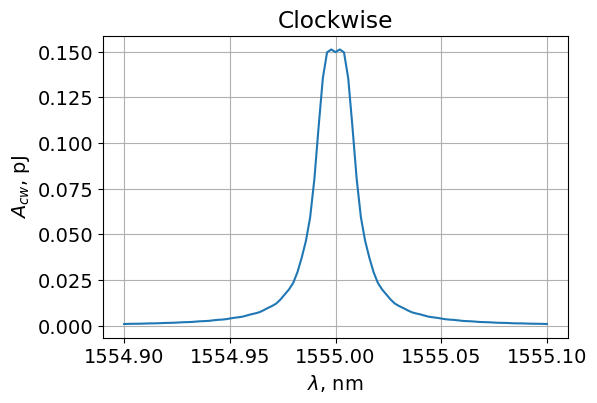

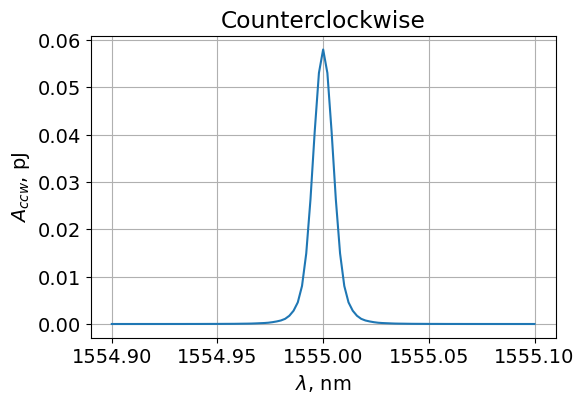

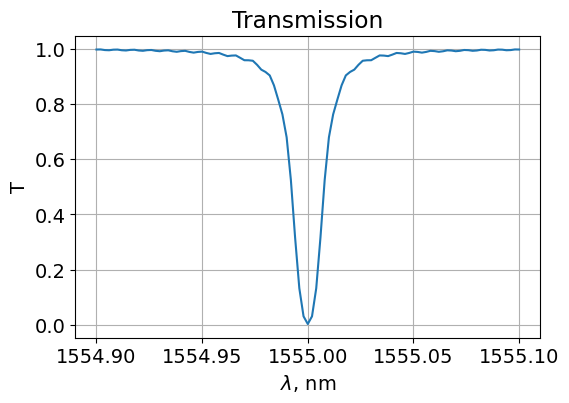

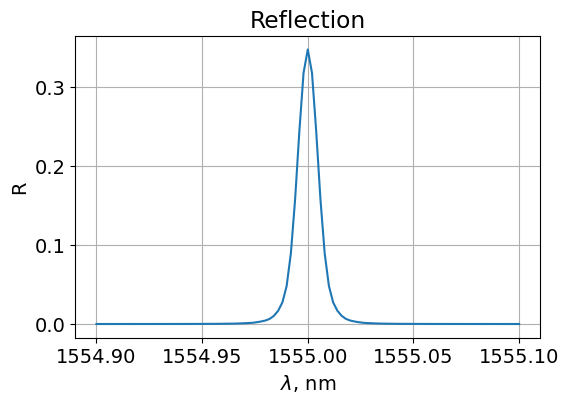

In [103]:
# constants
Gamma_0 = 1.6 #GHz
Gamma_c = 1.8*Gamma_0 #GHz
Gamma_ext = 3 #GHz

wl0 = 1555
dwls = np.linspace(-0.1, 0.1, 101)

P_in = 1 #in mW
A_in = np.sqrt(P_in) #is sqrt(mW)=sqrt(pJ/ns)

acw_0 = 0
accw_0 = 0
init = [acw_0, accw_0]

As_cw = []
As_ccw = []
Ts = []
Rs = []
for dwl in dwls:
    wl = wl0+dwl
    omega0 = frequency(wl0)*1e-9 #GHz
    omega = frequency(wl)*1e-9 #GHz
    domega = omega-omega0
    
    t0 = 1
    N = 1e+3
    t = np.linspace(0, t0, int(N))
    a_cw, a_ccw  = RungeKutta4(acw_accw, init, t)
    
    A_cw = abs(a_cw)**2
    A_ccw = abs(a_ccw)**2
    T = Transmission(a_cw, A_in)
    R = Reflection(a_ccw,  A_in)
    
    As_cw.append(A_cw[-1]) 
    As_ccw.append(A_ccw[-1])
    Ts.append(T[-1])
    Rs.append(R[-1])
    
plt.figure(figsize=(6, 4))
plt.title('Clockwise')
plt.ylabel(r'$A_{cw}$, pJ')
plt.xlabel(r'$\lambda$, nm')
plt.grid()
plt.plot(wl0+dwls, As_cw)

plt.figure(figsize=(6, 4))
plt.title('Counterclockwise')
plt.ylabel(r'$A_{ccw}$, pJ')
plt.xlabel(r'$\lambda$, nm')
plt.grid()
plt.plot(wl0+dwls, As_ccw)

plt.figure(figsize=(6, 4))
plt.title('Transmission')
plt.ylabel(r'T')
plt.xlabel(r'$\lambda$, nm')
plt.grid()
plt.plot(wl0+dwls, Ts)

plt.figure(figsize=(6, 4))
plt.title('Reflection')
plt.ylabel(r'R')
plt.xlabel(r'$\lambda$, nm')
plt.grid()
plt.plot(wl0+dwls, Rs)

## Transmission  T($P_{in}$)

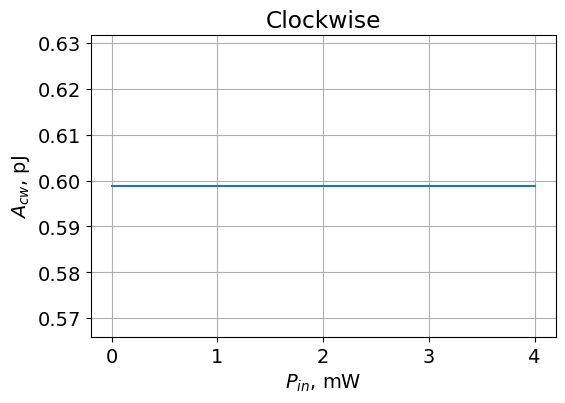

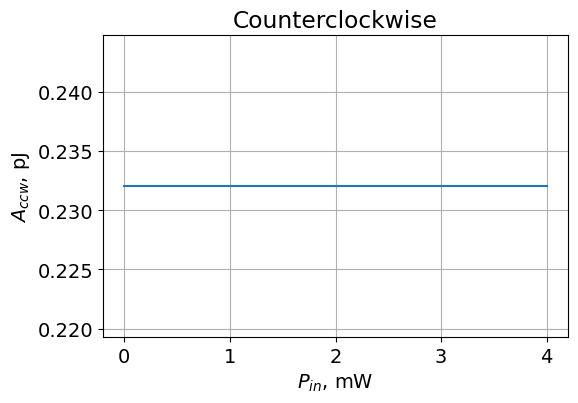

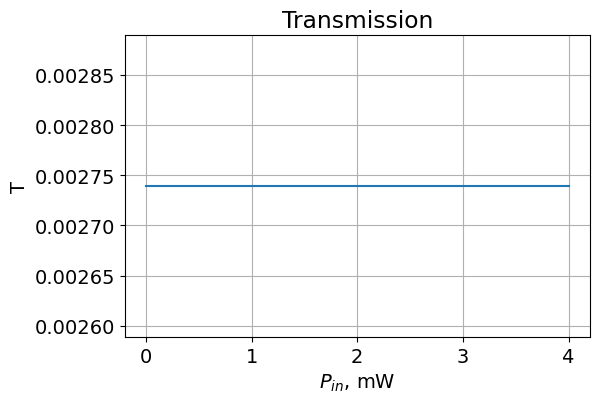

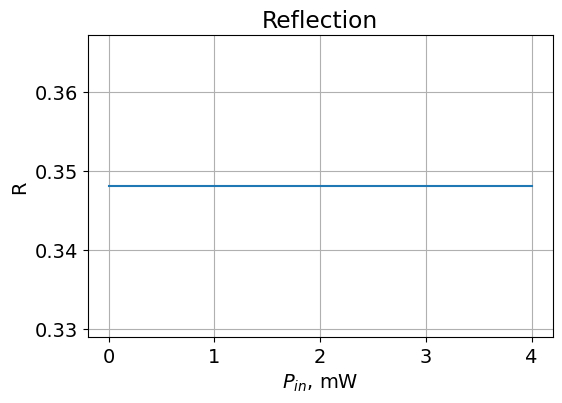

In [105]:
# constants
Gamma_0 = 1.6 #GHz
Gamma_c = 1.8*Gamma_0 #GHz
Gamma_ext = 3

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

Xgrid = Gamma_exts
P_ins = np.linspace(0, 4, 20)#in mW
A_in = np.sqrt(P_in) #is sqrt(mW)=sqrt(pJ/ns)

acw_0 = 0
accw_0 = 0
init = [acw_0, accw_0]

As_cw = []
As_ccw = []
Ts = []
Rs = []
for P_in in P_ins:
    t0 = 1
    N = 1e+3
    t = np.linspace(0, t0, int(N))
    a_cw, a_ccw  = RungeKutta4(acw_accw, init, t)
    
    A_cw = abs(a_cw)**2
    A_ccw = abs(a_ccw)**2
    T = Transmission(a_cw, A_in)
    R = Reflection(a_ccw,  A_in)
    
    As_cw.append(A_cw[-1]) 
    As_ccw.append(A_ccw[-1])
    Ts.append(T[-1])
    Rs.append(R[-1])
    
plt.figure(figsize=(6, 4))
plt.title('Clockwise')
plt.ylabel(r'$A_{cw}$, pJ')
plt.xlabel(r'$P_{in}$, mW')
plt.grid()
plt.plot(P_ins, As_cw)

plt.figure(figsize=(6, 4))
plt.title('Counterclockwise')
plt.ylabel(r'$A_{ccw}$, pJ')
plt.xlabel(r'$P_{in}$, mW')
plt.grid()
plt.plot(P_ins, As_ccw)

plt.figure(figsize=(6, 4))
plt.title('Transmission')
plt.ylabel(r'T')
plt.xlabel(r'$P_{in}$, mW')
plt.grid()
plt.plot(P_ins, Ts)

plt.figure(figsize=(6, 4))
plt.title('Reflection')
plt.ylabel(r'R')
plt.xlabel(r'$P_{in}$, mW')
plt.grid()
plt.plot(P_ins, Rs)

The transmission is independent on input power -- **proved**

# Thermal  nonlinearity addition

In [40]:
def acw_accw_theta(t, y):
    '''
    Function for laser dynamics without locking
    '''
    a_cw, a_ccw, theta = y
    dydt = [(1j*domega-Gamma_0-Gamma_ext+1j*omega0*betha*theta)*a_cw +1j*Gamma_c*a_ccw+1j*np.sqrt(2*Gamma_ext)*A_in, 
            (1j*domega-Gamma_0-Gamma_ext+1j*omega0*betha*theta)*a_ccw+1j*Gamma_c*a_cw,
            -delta*theta+B*(abs(a_cw)**2+abs(a_ccw)**2)]
    dydt = np.array(dydt)
    dydt.astype('complex128')
    return dydt

In [41]:
betha = 4e-6
delta = 7.12e-6
B = 1.26e-4

In [42]:
# constants
Gamma_0 = 1.6 #GHz
Gamma_ext= 3 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

In [44]:
%%time
P_in = 1 #in mW
A_in = np.sqrt(P_in) #is sqrt(mW)=sqrt(pJ/ns)

acw_0 = 0
accw_0 = 0
theta_0 = 0
init = [acw_0, accw_0, theta_0]

t0 = 10 #ns
N = 1e+5
t = np.linspace(0, t0, int(N))
a_cw, a_ccw, theta  = RungeKutta4(acw_accw_theta, init, t)

init = [a_cw[-1], a_ccw[-1], theta[-1]]
t_new = 2e+6 #ns
N = 2e+7
t_new = np.linspace(t0, t_new, int(N))
a_cw_new, a_ccw_new, theta_new  = RungeKutta4(acw_accw_theta, init, t_new)
a_cw = np.append(a_cw[:-1], a_cw_new)
a_ccw = np.append(a_ccw[:-1], a_ccw_new)
theta = np.append(theta[:-1], theta_new)
t = np.append(t[:-1], t_new)

A_cw = abs(a_cw)**2
A_ccw = abs(a_ccw)**2
T = Transmission(a_cw, A_in)
R = Reflection(a_ccw,  A_in)

Wall time: 47min 38s


C:\Users\myste\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


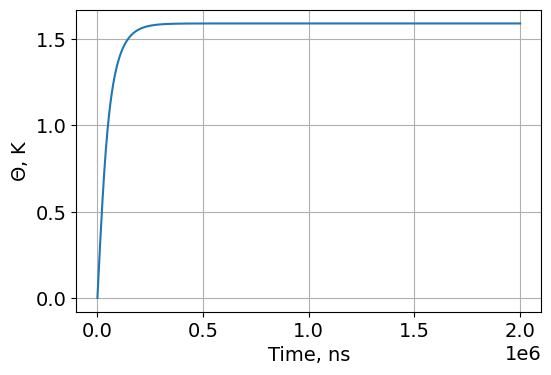

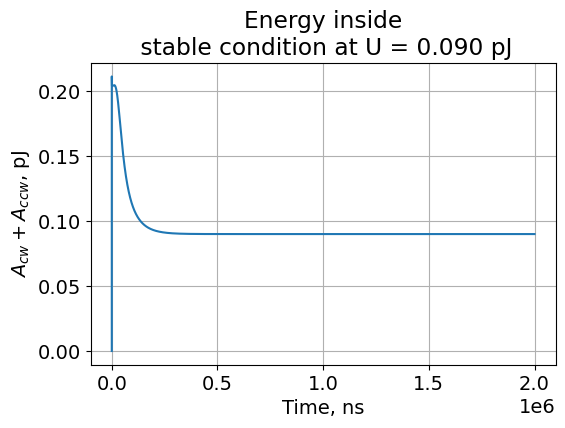

In [45]:
plt.figure(figsize=(6, 4))
# plt.title('Temperature')
plt.ylabel(r'$\Theta$, K')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, theta)

plt.figure(figsize=(6, 4))
plt.title(f'Energy inside\n stable condition at U = {A_cw[-1]+A_ccw[-1]:0.3f} pJ')
plt.ylabel(r'$A_{cw}+A_{ccw}$, pJ')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, A_cw+A_ccw)

C:\Users\myste\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


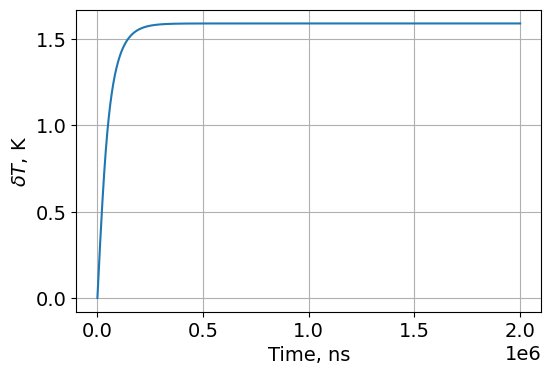

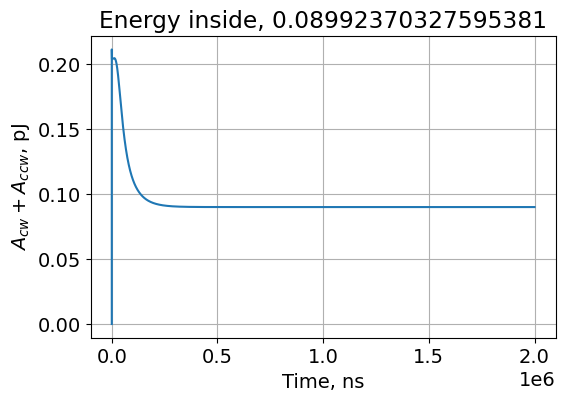

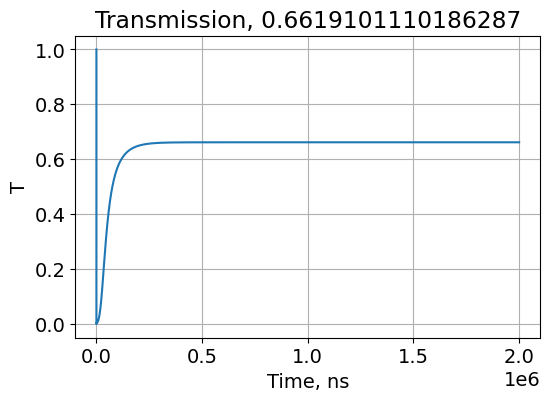

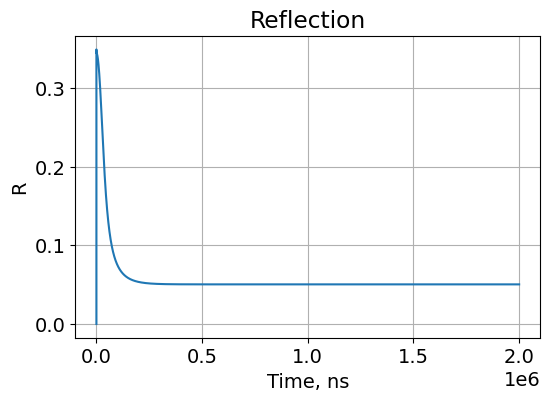

In [46]:
plt.figure(figsize=(6, 4))
# plt.title('Temperature')
plt.ylabel(r'$\delta T$, K')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, theta)

plt.figure(figsize=(6, 4))
plt.title(f'Energy inside, {A_cw[-1]+A_ccw[-1]}')
plt.ylabel(r'$A_{cw}+A_{ccw}$, pJ')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, A_cw+A_ccw)

plt.figure(figsize=(6, 4))
plt.title(f'Transmission, {T[-1]}')
plt.ylabel(r'T')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, T)
# plt.ylim(0, 0.5)

plt.figure(figsize=(6, 4))
plt.title('Reflection')
plt.ylabel(r'R')
plt.xlabel('Time, ns')
plt.grid()
plt.plot(t, R)

## Power dependence $P_{out}(P_{in})$

T=0.4646530469713226, P_out=0.23232652348566135


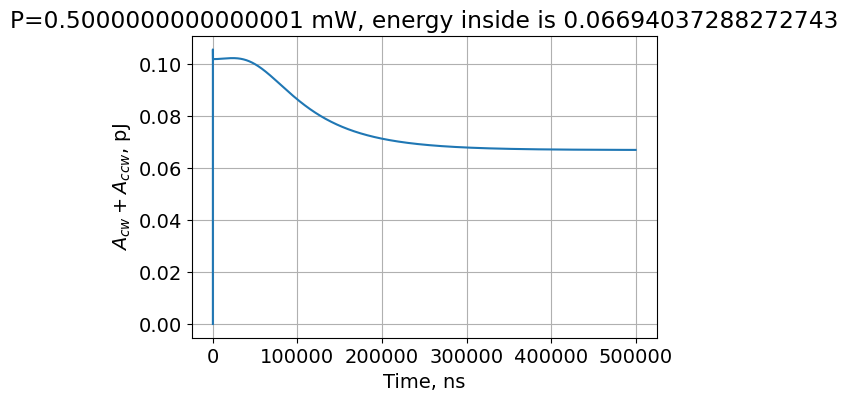

T=0.661859828390494, P_out=0.661859828390494


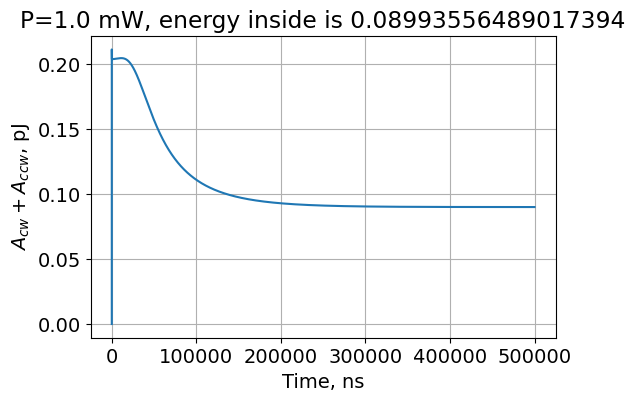

T=0.7448768072215337, P_out=1.1173152108323003


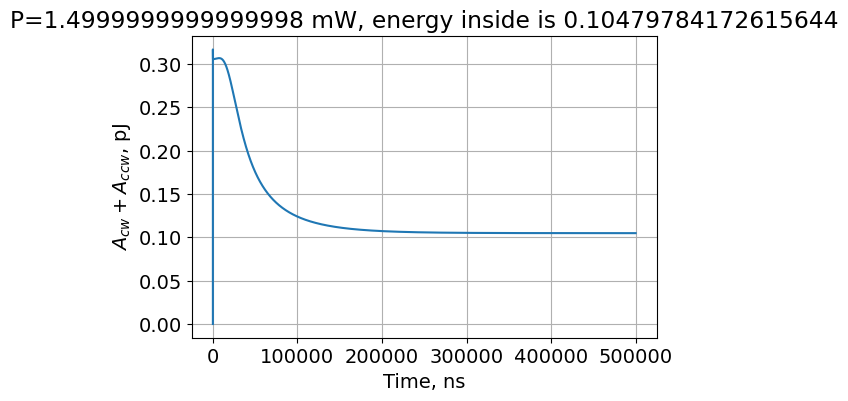

T=0.791534823705388, P_out=1.5830696474107764


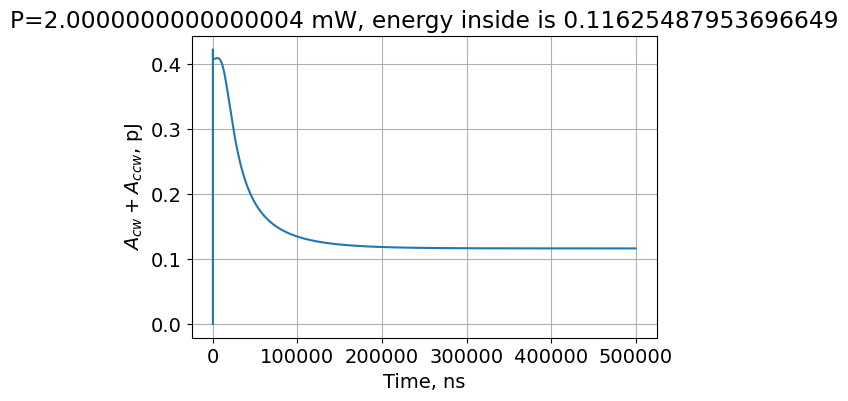

T=0.8218398305687422, P_out=2.054599576421856


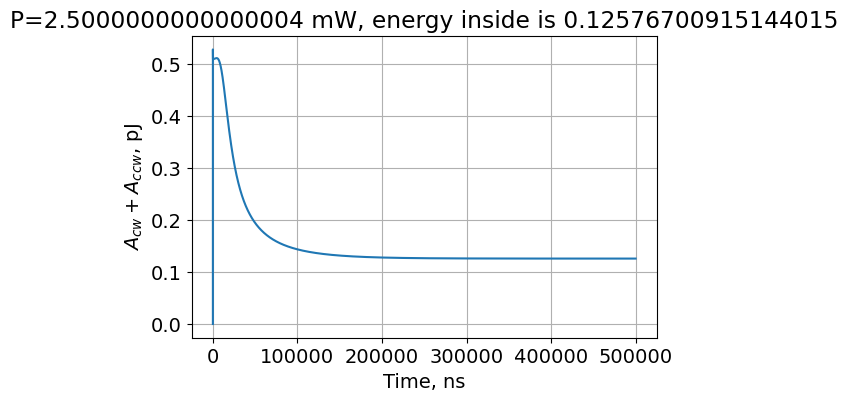

T=0.8433037776739815, P_out=2.529911333021944


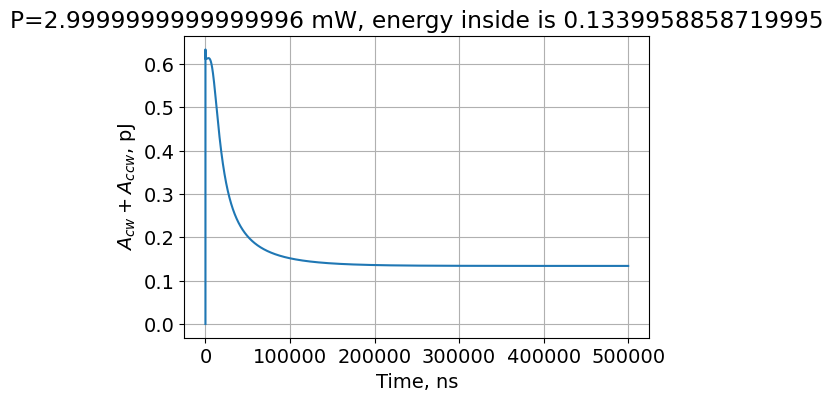

T=0.8594085860788236, P_out=3.0079300512758826


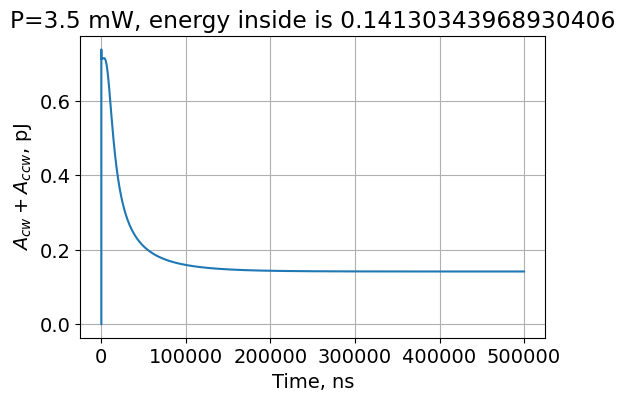

T=0.8720004817449682, P_out=3.488001926979873


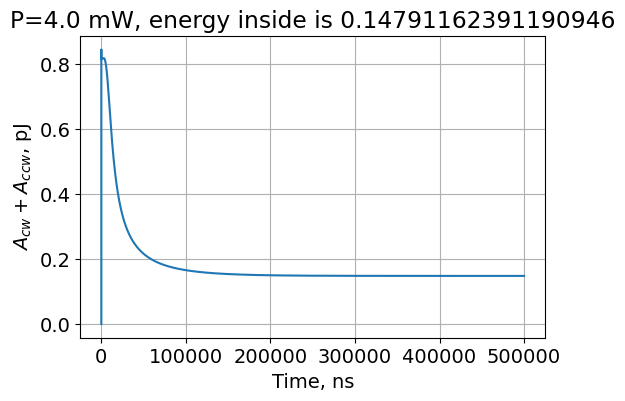

T=0.8821546252857818, P_out=3.9696958137860174


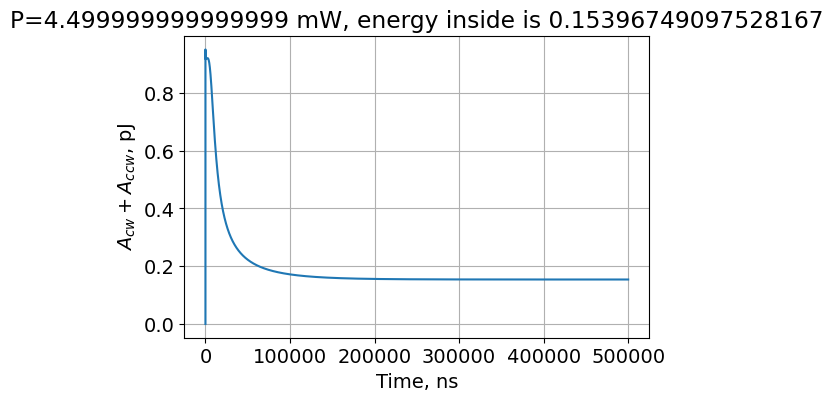

T=0.8905420826655112, P_out=4.452710413327557


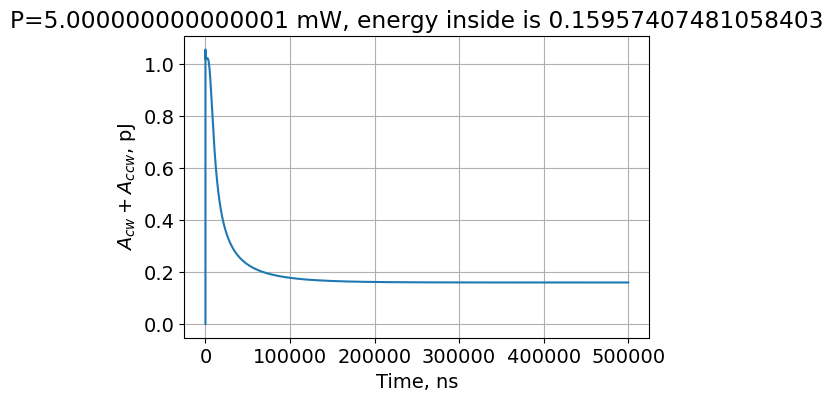

T=0.8976046831893649, P_out=4.9368257575415075


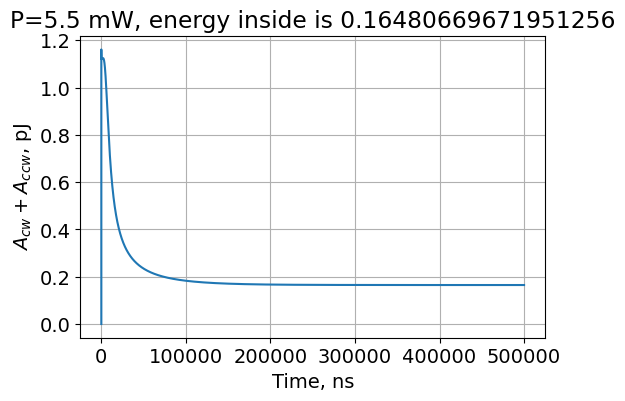

T=0.9036459457643048, P_out=5.421875674585828


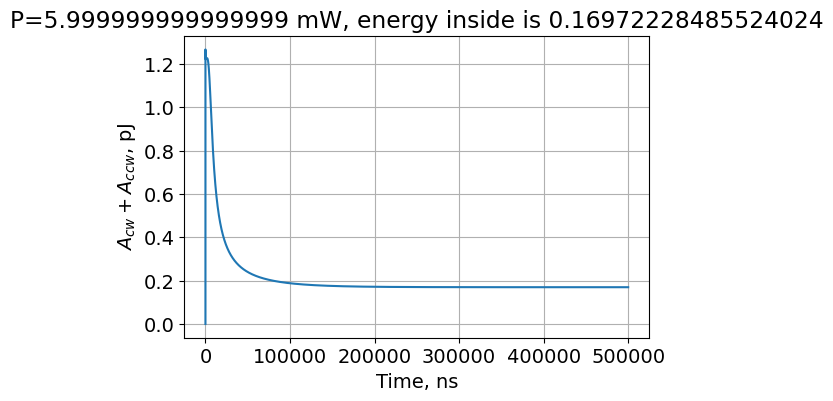

T=0.9088817140482978, P_out=5.907731141313935


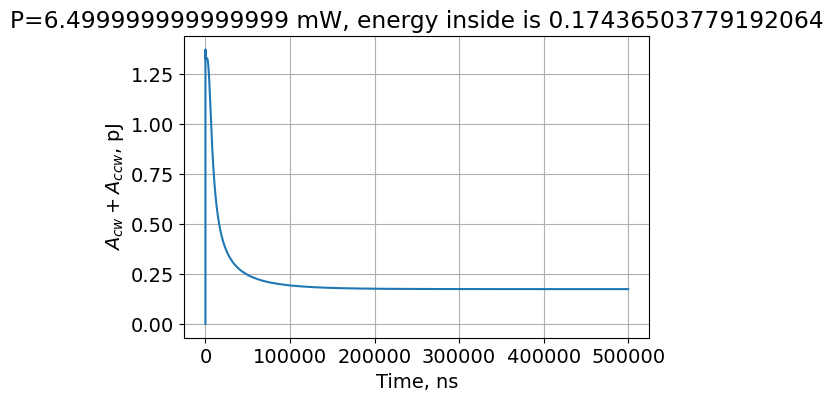

T=0.9134699567705103, P_out=6.394289697393574


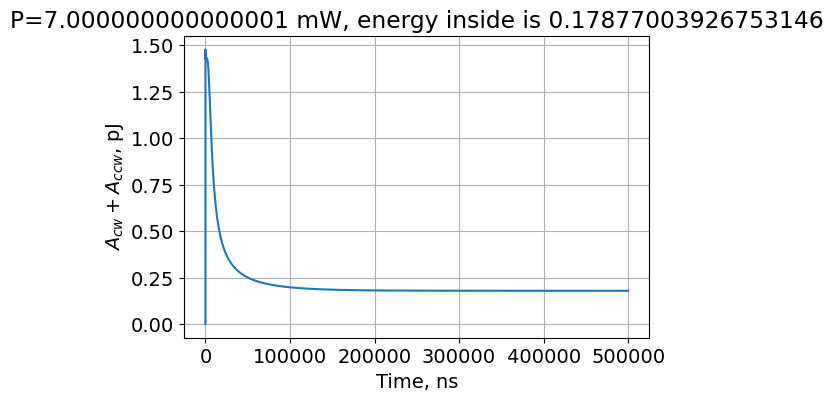

T=0.9175291241710608, P_out=6.881468431282956


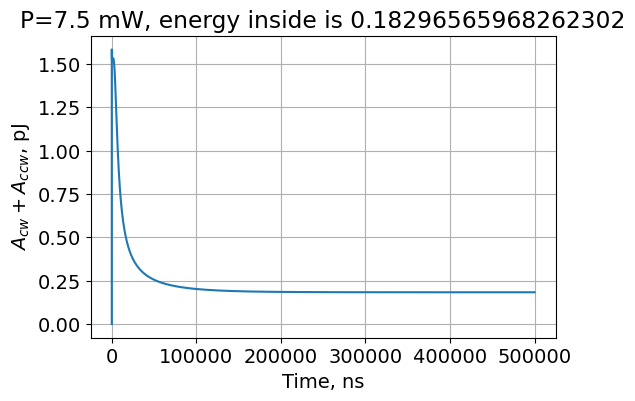

T=0.9211498963889627, P_out=7.3691991711117035


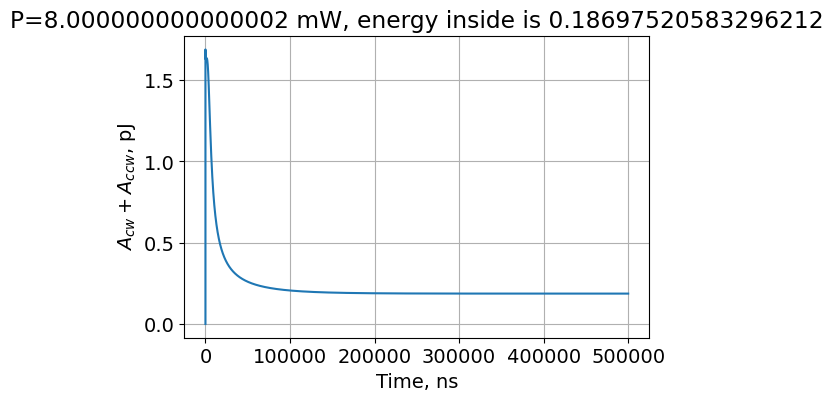

T=0.924402951835719, P_out=7.857425090603611


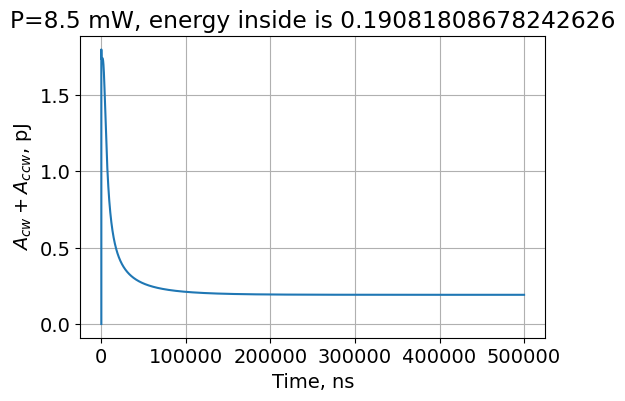

T=0.9273442504008688, P_out=8.346098253607819


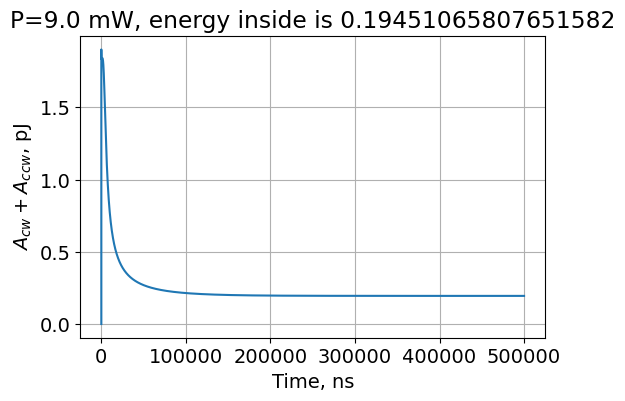

T=0.9300187156993223, P_out=8.83517779914356


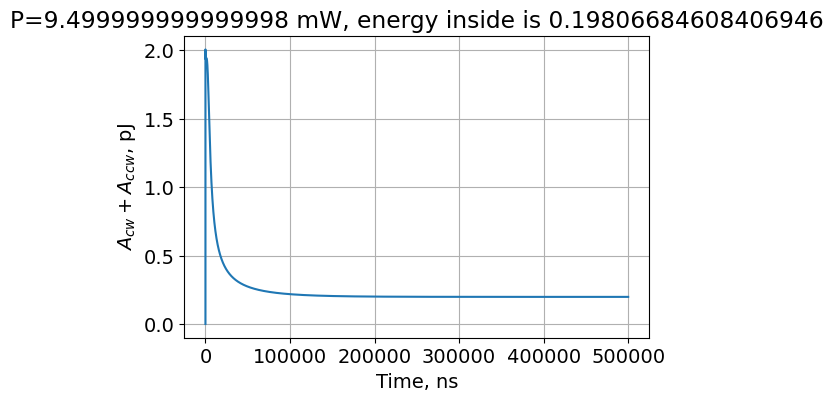

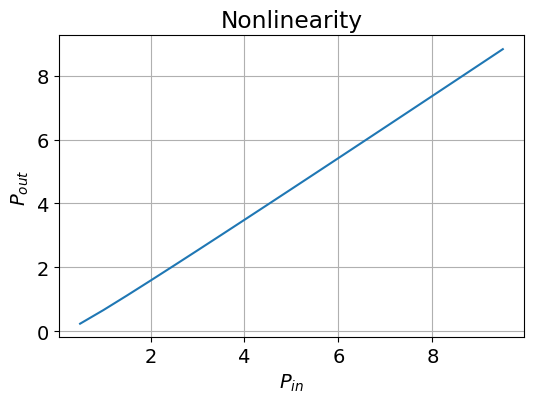

In [13]:
# constants
betha = 4e-6
delta = 7.12e-6
B = 1.26e-4
Gamma_0 = 1.6 #GHz
Gamma_ext= 3 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

P_ins = np.arange(0.5, 10, 0.5)  #in mW
P_outs = []
A_ins = np.sqrt(P_ins) #is sqrt(mW)=sqrt(pJ/ns)

for A_in in A_ins:
    acw_0 = 0
    accw_0 = 0
    theta_0 = 0
    init = [acw_0, accw_0, theta_0]
    
    t0 = 10 #ns
    N = 1e+5
    t = np.linspace(0, t0, int(N))
    a_cw, a_ccw, theta = RungeKutta4(acw_accw_theta, init, t)
    
    init = [a_cw[-1], a_ccw[-1], theta[-1]]
    t_new = 0.5e+6 #ns
    N = 5e+6
    t_new = np.linspace(t0, t_new, int(N))
    a_cw_new, a_ccw_new, theta_new  = RungeKutta4(acw_accw_theta, init, t_new)
    a_cw = np.append(a_cw[:-1], a_cw_new)
    a_ccw = np.append(a_ccw[:-1], a_ccw_new)
    theta = np.append(theta[:-1], theta_new)
    t = np.append(t[:-1], t_new)
    
    A_cw = abs(a_cw)**2
    A_ccw = abs(a_ccw)**2
    T = Transmission(a_cw, A_in)
    R = Reflection(a_ccw,  A_in)
    
    plt.figure(figsize=(6, 4))
    plt.title(f'P={A_in**2} mW, energy inside is {A_cw[-1]+A_ccw[-1]}')
    plt.ylabel(r'$A_{cw}+A_{ccw}$, pJ')
    plt.xlabel('Time, ns')
    plt.grid()
    plt.plot(t, A_cw+A_ccw)
    P_outs.append(A_in**2*T[-1])
    print(f'T={T[-1]}, P_out={A_in**2*T[-1]}')
    plt.show()

plt.figure(figsize=(6, 4))
plt.title(f'Nonlinearity')
plt.ylabel(r'$P_{out}$')
plt.xlabel(r'$P_{in}$')
plt.grid()
plt.plot(P_ins, P_outs)   

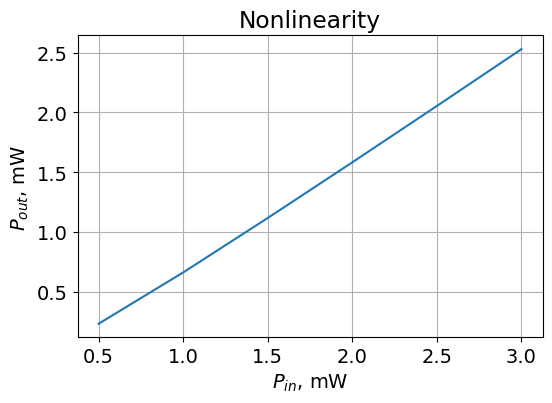

In [185]:
plt.figure(figsize=(6, 4))
plt.title(f'Nonlinearity')
plt.ylabel(r'$P_{out}$, mW')
plt.xlabel(r'$P_{in}$, mW')
plt.grid()
plt.plot(P_ins[:6], P_outs)   

In [186]:
P_o

[0.23255763486121048,
 0.6619101110186287,
 1.1173425941460775,
 1.5830898563508191,
 2.0546165657677204,
 2.529926592384975]

## T and R over Pin

In [23]:
# constants
betha = 4e-6
delta = 7.12e-6
B = 1.26e-4
Gamma_0 = 1.6 #GHz
Gamma_ext= 3 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

P_ins = np.arange(0.5, 10, 0.5)  #in mW
P_outs = []
A_ins = np.sqrt(P_ins) #is sqrt(mW)=sqrt(pJ/ns)
trans = []
reflec = []
for A_in in A_ins:
    acw_0 = 0
    accw_0 = 0
    theta_0 = 0
    init = [acw_0, accw_0, theta_0]
    print(A_in)
    
    t0 = 10 #ns
    N = 1e+5
    t = np.linspace(0, t0, int(N))
    a_cw, a_ccw, theta = RungeKutta4(acw_accw_theta, init, t)
    
    init = [a_cw[-1], a_ccw[-1], theta[-1]]
    t_new = 0.5e+6 #ns
    N = 5e+6
    t_new = np.linspace(t0, t_new, int(N))
    a_cw_new, a_ccw_new, theta_new  = RungeKutta4(acw_accw_theta, init, t_new)
    a_cw = np.append(a_cw[:-1], a_cw_new)
    a_ccw = np.append(a_ccw[:-1], a_ccw_new)
    theta = np.append(theta[:-1], theta_new)
    t = np.append(t[:-1], t_new)
    
    A_cw = abs(a_cw)**2
    A_ccw = abs(a_ccw)**2
    T = Transmission(a_cw, A_in)
    R = Reflection(a_ccw,  A_in)
    trans.append(T[-1])
    reflec.append(R[-1])
    

0.7071067811865476
1.0
1.224744871391589
1.4142135623730951
1.5811388300841898
1.7320508075688772
1.8708286933869707
2.0
2.1213203435596424
2.23606797749979
2.345207879911715
2.449489742783178
2.5495097567963922
2.6457513110645907
2.7386127875258306
2.8284271247461903
2.9154759474226504
3.0
3.082207001484488


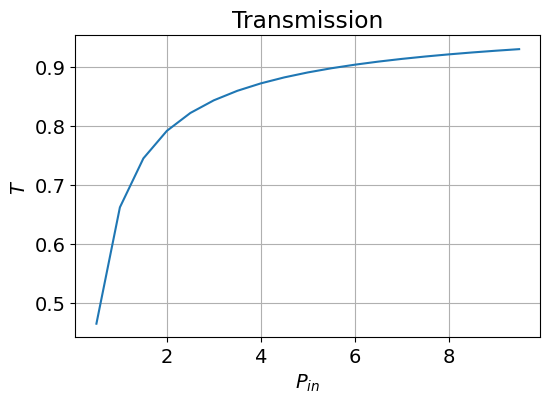

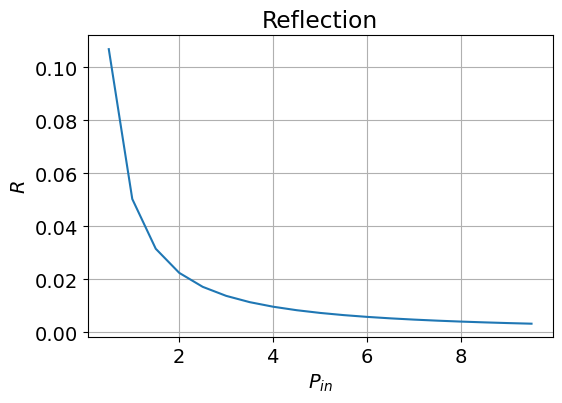

In [25]:
plt.figure(figsize=(6, 4))
plt.title("Transmission")
plt.ylabel(r'$T$')
plt.xlabel(r'$P_{in}$')
plt.grid()
plt.plot(P_ins, trans)
plt.show()

plt.figure(figsize=(6, 4))
plt.title(f'Reflection')
plt.ylabel(r'$R$')
plt.xlabel(r'$P_{in}$')
plt.grid()
plt.plot(P_ins, reflec)
plt.show()

## The nonlinear behavior of T and R did not give the nonlinearity for Pout vs Pin, so we should try another powers or characteristics of the system.

## Also, we need to overcome the difficulty of computations, so here all results will be stored as files and then manipulated to find the dependancies

In [ ]:
def frequency(wavelength):
    c = 299792458
    return 2*np.pi*c/wavelength/1e-9
def Transmission(a_cw, A_in):
    return abs(1+1j*np.sqrt(2*Gamma_ext)*a_cw/A_in)**2
def Reflection(a_ccw, A_in):
    return abs(1j*np.sqrt(2*Gamma_ext)*a_ccw/A_in)**2
def der_acw(a_cw, a_ccw, theta):
    return (1j*domega-Gamma_0-Gamma_ext+1j*omega0*betha*theta)*a_cw +1j*Gamma_c*a_ccw+1j*np.sqrt(2*Gamma_ext)*A_in
def der_accw(a_cw, a_ccw, theta):
    return (1j*domega-Gamma_0-Gamma_ext+1j*omega0*betha*theta)*a_ccw+1j*Gamma_c*a_cw
def der_theta(a_cw, a_ccw, theta):
    return -delta*theta+B*(abs(a_cw)**2+abs(a_ccw)**2)
def acw_accw_theta(t, y):
    acw, accw, theta  = y
    dydt = [der_acw(acw,accw,theta), der_accw(acw,accw,theta), der_theta(acw,accw,theta)]
    return dydt
def solver(t, y):
    acw, accw, theta  = y
    dydt = [der_acw(acw,accw,theta), der_accw(acw,accw,theta), der_theta(acw,accw,theta)]
    return dydt
def RungeKutta4(func, initials, time):
    '''
    func: function to be integrated
    initials: list of initial conditions
    time: array of independent variable
    '''
    dt = time[1]-time[0]
    dim = len(initials)
    y = np.zeros([dim, time.size]).astype('complex128')
    for i in range(dim):
        y[i, 0]=initials[i]
    for j in range(time.size-1):
        y_prev = np.array(y[:, j]).astype('complex128')
        k1=np.array( func(time[j], y_prev) ).astype('complex128')
        k2=np.array( func(time[j]+dt/2, y_prev+k1*dt/2) ).astype('complex128')
        k3=np.array( func(time[j]+dt/2, y_prev+k2*dt/2) ).astype('complex128')
        k4=np.array( func(time[j]+dt, y_prev+k3*dt) ).astype('complex128')
        a=np.zeros([dim]).astype('complex128')
        for k in range(dim):
            a[k] = (k1[k]+2*k2[k]+k4[k]+2*k3[k])*dt/6
            y[k, j+1]=y_prev[k]+a[k]
    for i in range(dim):
        y=y.astype('complex128')
    return y
def solve_sys(y0, t, A_in, t_ev):
    #sol = RungeKutta4(solver, y0, t)
    sol = solve_ivp(acw_accw_theta, t, y0, t_eval = t_ev)
    return sol
def save_data(data, column_vals, filename, path):
    new_frame = pd.DataFrame(data=data, index = np.arange(0,len(data),1), columns=column_vals)
    os.makedirs(path, exist_ok=True)
    new_frame.to_csv(filename, sep=',')

In [ ]:
betha = 4e-6
delta = 7.12e-6
B = 1.26e-4
Gamma_0 = 1.6 #GHz
# Gamma_ext= 1 #GHz
Gamma_c = 1.8*Gamma_0 #GHz

wl0 = 1555
dwl = 0
wl = wl0+dwl

omega0 = frequency(wl0)*1e-9 #GHz
omega = frequency(wl)*1e-9 #GHz
domega = omega-omega0

def dlam(G):
    global Gamma_ext
    Gamma_ext = G
    P_ins = np.arange(0.05, 0.35, 0.05)  #in mW
    P_outs = []
    A_ins = np.sqrt(P_ins) #is sqrt(mW)=sqrt(pJ/ns)
    trans = []
    refl = []
    os.makedirs(f"Gext = {G}", exist_ok=True)
    acw_st, accw_st, theta_st, dacw_st, daccw_st, dtheta_st, U_st, dU_st = [], [], [], [], [], [], [], []
    for a_in in A_ins:
        global A_in
        A_in = a_in
        acw_0 = 0
        accw_0 = 0
        theta_0 = 0
        init = [acw_0, accw_0, theta_0]

        t0 = 10 #ns
        N = 1e+5
        t = np.linspace(0, t0, int(N))
        a_cw, a_ccw, theta = RungeKutta4(acw_accw_theta, init, t)

        init = [a_cw[-1], a_ccw[-1], theta[-1]]
        t_new = 0.5e+6 #ns
        N = 5e+6
        t_new = np.linspace(t0, t_new, int(N))
        a_cw_new, a_ccw_new, theta_new  = RungeKutta4(acw_accw_theta, init, t_new)
        a_cw = np.append(a_cw[:-1], a_cw_new)
        a_ccw = np.append(a_ccw[:-1], a_ccw_new)
        theta = np.append(theta[:-1], theta_new)
        t = np.append(t[:-1], t_new)

        A_cw = abs(a_cw)**2
        A_ccw = abs(a_ccw)**2
        T = Transmission(a_cw, A_in)
        R = Reflection(a_ccw,  A_in)
        dacw = der_acw(a_cw, a_ccw, theta)
        daccw = der_accw(a_cw, a_ccw, theta)
        dtheta = der_theta(a_cw, a_ccw, theta)
        U = A_cw+A_ccw
        dU = abs(dacw)**2+abs(daccw)**2

        column_vals = ["t","acw", "accw", "theta", "dacw", "daccw", "dtheta", "U", "dU", "T", "R"]
        data = np.column_stack((t,a_cw,a_ccw,theta,dacw,daccw,dtheta,U,dU,T,R))
        
        save_data(data,column_vals,f"Gext = {G}/p_in = {A_in**2}",f'Gext = {G}')
#         names.append(f"Gext = {G}/p_in = {A_in**2}")
        trans.append(T[-1])
        refl.append(R[-1])
        acw_st.append(a_cw[-1])
        accw_st.append(a_ccw[-1])
        theta_st.append(theta[-1])
        dacw_st.append(dacw[-1])
        daccw_st.append(daccw[-1])
        dtheta_st.append(dtheta[-1])
        U_st.append(U[-1])
        dU_st.append(dU[-1])

        plt.figure(figsize=(6, 4))
        plt.title(f'P={A_in**2} mW, energy inside is {A_cw[-1]+A_ccw[-1]}')
        plt.ylabel(r'$A_{cw}+A_{ccw}$, pJ')
        plt.xlabel('Time, ns')
        plt.grid()
        plt.plot(t, A_cw+A_ccw)
        P_outs.append(A_in**2*T[-1])
        plt.show()

    delta_w = wl*betha*np.array(theta_st)# delta_w = frequency(wl)*betha*np.array(theta_st) 
    
    lam = 1555.0
    c = 3*10**8 #nm/ns
    delta_lam = lam**2*delta_w/(2*np.pi*c)

    plt.figure(figsize=(6, 4))
    plt.title(r"$\Delta$$\lambda$ Vs $P_{in}$" 
              "\n" r"$Г_{ext} = 1 GHz$")
    plt.ylabel(r'$\Delta$ $\lambda$, nm',)
    plt.xlabel(r'$P_{in}$, mW')
    plt.grid()
    plt.plot(P_ins, delta_lam, **{'marker': 'o'})
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.title(r'$P_{out}$ Vs $P_{in}$'
             "\n" f'Гext = {Gamma_ext} GHz')
    plt.ylabel(r'$P_{out}$, mW')
    plt.xlabel(r'$P_{in}$, mW')
    plt.grid()
    P_outs = trans*P_ins
    plt.plot(P_ins, P_outs, **{'marker': 'o'})
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.title(r"$\Delta$ $\omega$ Vs $P_{in}$" 
             "\n" f'Гext = {Gamma_ext} GHz')
    plt.ylabel(r'$\Delta$ $\omega$, GHz',)
    plt.xlabel(r'$P_{in}$, mW')
    plt.grid()
    plt.plot(P_ins, delta_w, **{'marker': 'o'})
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.title(r'Transmission Vs $P_{in}$' 
             "\n" f'Гext = {Gamma_ext} GHz')
    plt.ylabel(r'T')
    plt.xlabel(r'$P_{in}$, mW')
    plt.grid()
    plt.plot(P_ins, trans, **{'marker': 'o'})
    plt.show()
    
    return delta_lam

In [ ]:
G_ext = np.arange(0.5, 4, 0.5)
ll = np.zeros(0)
for Gext in G_ext:
    a = dlam(Gext)
    ll = np.concatenate((ll, a), axis = 0)
ll = np.reshape(ll, (-1, np.size(a)))

In [ ]:
G_ext = np.arange(4, 10, 1)
ll = np.zeros(0)
for Gext in G_ext:
    a = dlam(Gext)
    ll = np.concatenate((ll, a), axis = 0)
ll = np.reshape(ll, (-1, np.size(a)))

### All computed files are then analysed in notebook Read and analyse data